In [1]:
import numpy as np
import pandas as pd
import copy
import random
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.applications import DenseNet121
#from tensorflow.keras.models import Model,load_model
from keras.models import Model,load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
from IPython.display import display
#from tensorflow.python.keras import *
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,optimizers
#from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras

In [3]:
keyfacial_df=pd.read_csv('Emotion AI Dataset/data.csv')

In [4]:
keyfacial_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [5]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [6]:
keyfacial_df['Image'].shape

(2140,)

In [7]:
keyfacial_df['Image']=keyfacial_df['Image'].apply(lambda x: np.fromstring(x,dtype=int,sep=' ').reshape(96, 96))

In [8]:
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [9]:
keyfacial_df['Image'][0].shape

(96, 96)

In [10]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

Task 2 visiulization of image

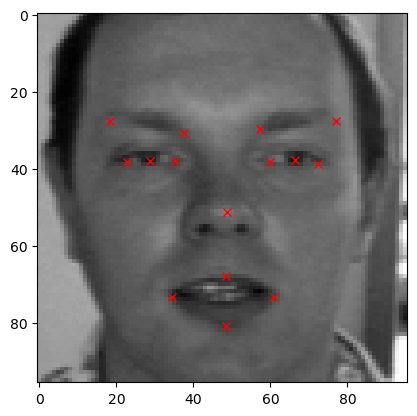

In [11]:
i=np.random.randint(1,len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i],cmap='gray')
for j in range(0,30,2):
  plt.plot(keyfacial_df.loc[i][j],keyfacial_df.loc[i][j+1],'rx')

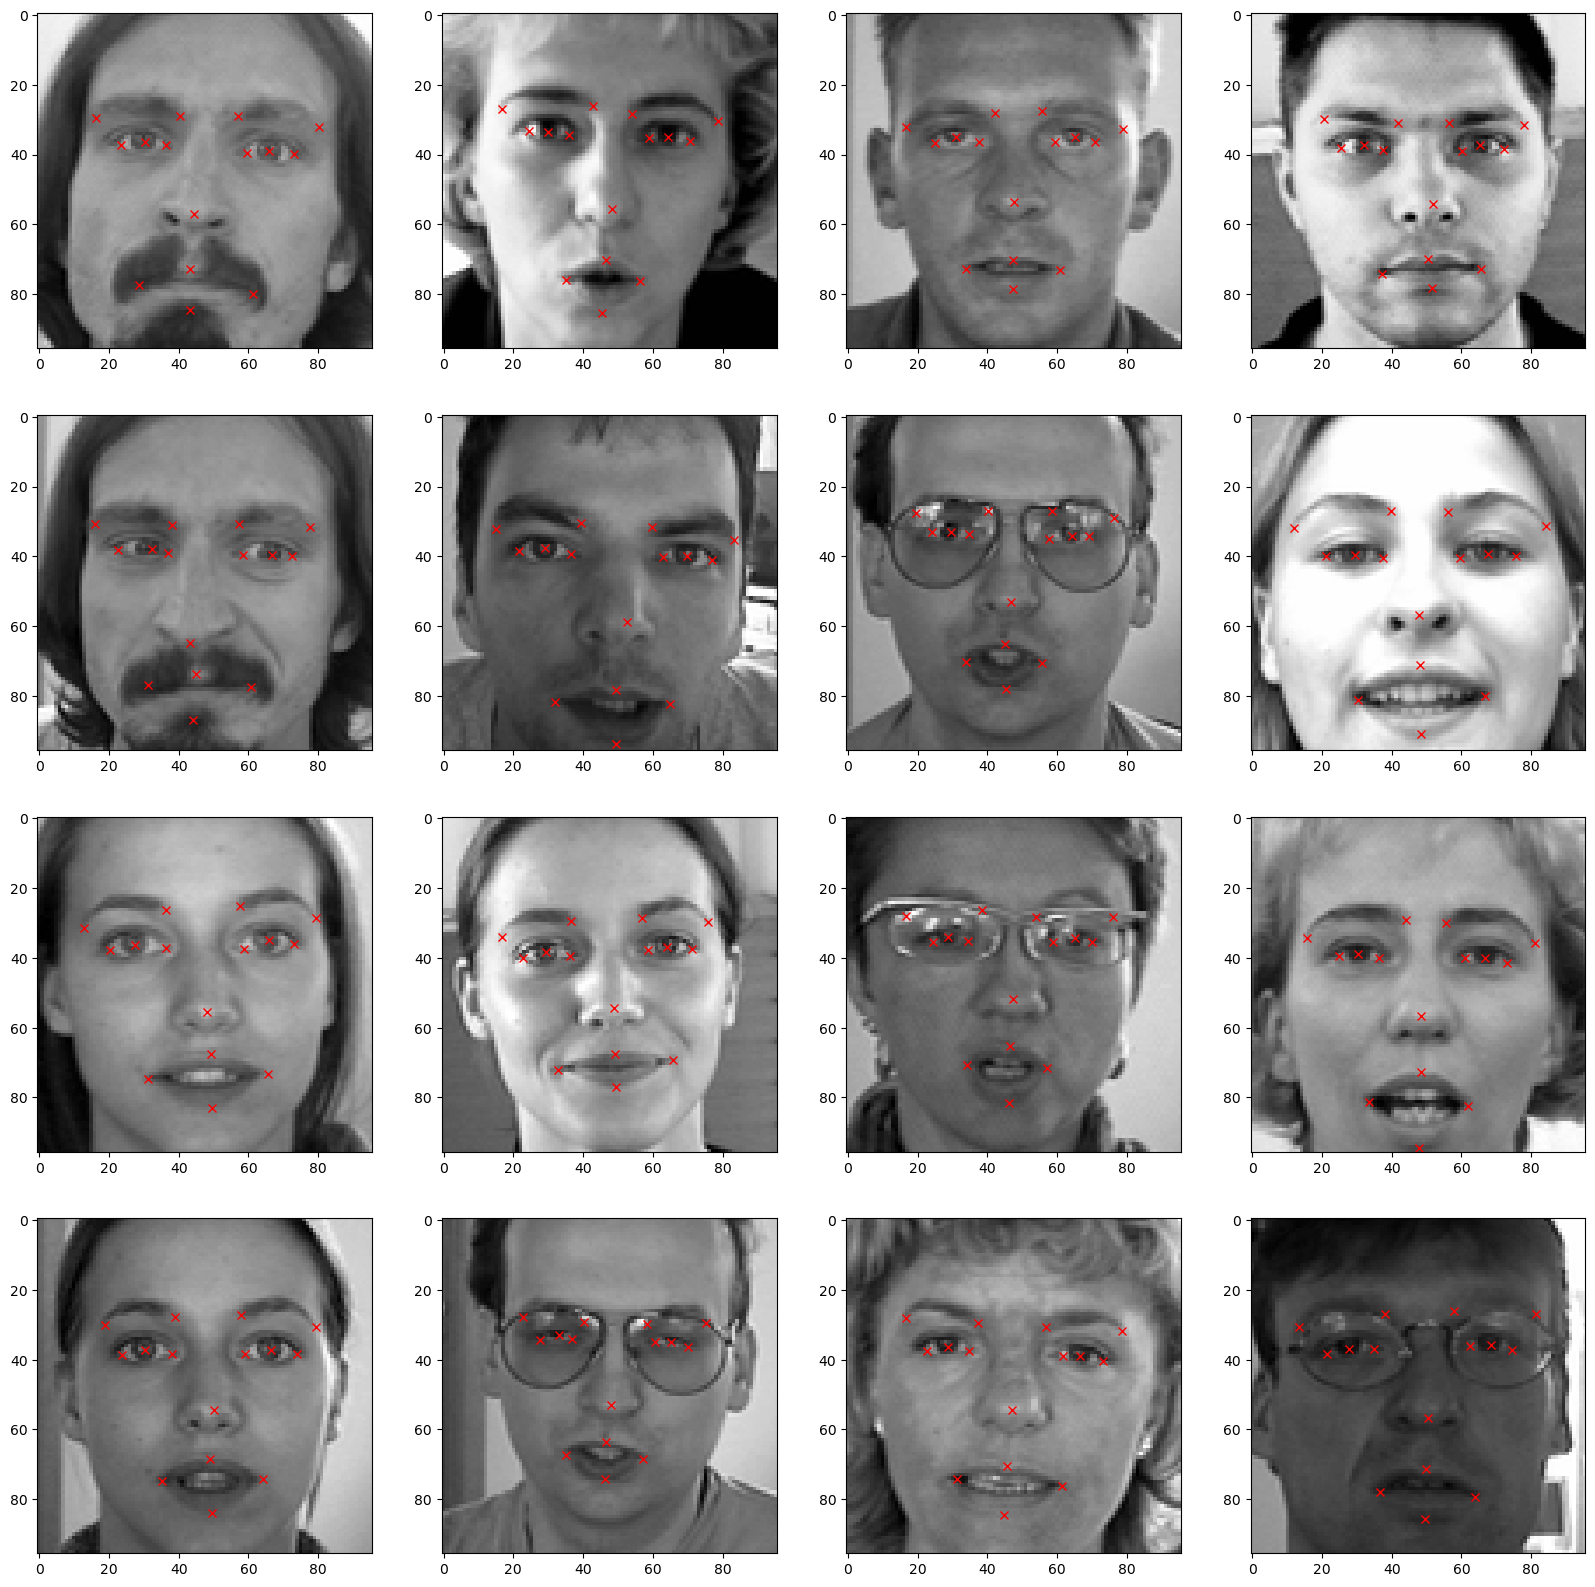

In [12]:
fig=plt.figure(figsize=(20,20))
for i in range(16):
  ax=fig.add_subplot(4,4,i+1)
  plt.imshow(keyfacial_df['Image'][i],cmap='gray')
  for j in range(0,30,2):
      plt.plot(keyfacial_df.loc[i][j],keyfacial_df.loc[i][j+1],'rx')


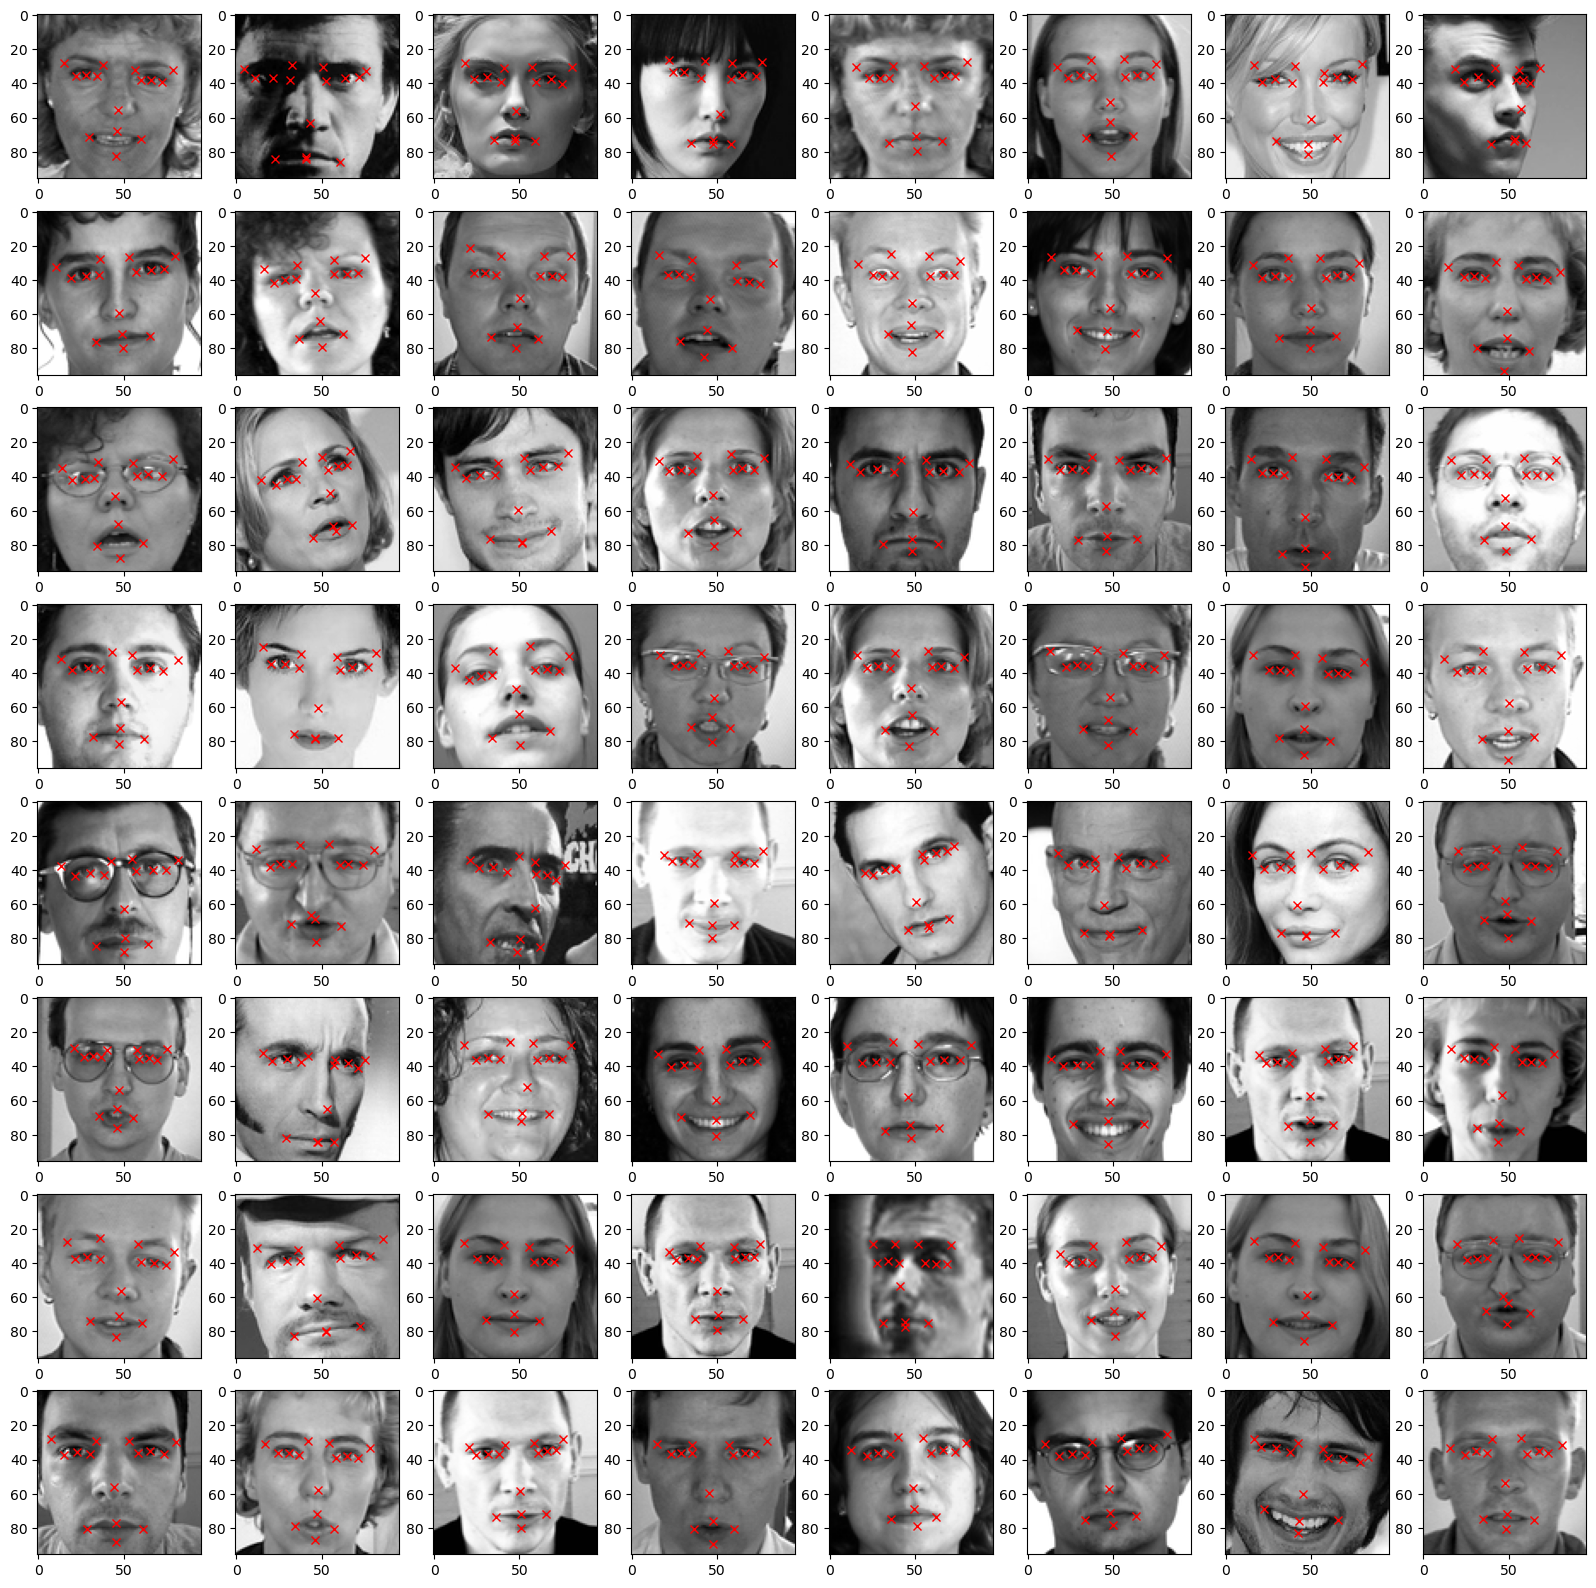

In [13]:
fig=plt.figure(figsize=(20,20))
for i in range(64):
  k=np.random.randint(1,len(keyfacial_df))
  ax=fig.add_subplot(8,8,i+1)
  plt.imshow(keyfacial_df['Image'][k],cmap='gray')
  for j in range(0,30,2):
      plt.plot(keyfacial_df.loc[k][j],keyfacial_df.loc[k][j+1],'rx')


Image augmenatation

In [14]:
import copy
hori_df=copy.copy(keyfacial_df)

In [15]:
columns=hori_df.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [16]:
hori_df['Image']=hori_df['Image'].apply(lambda x:np.flip(x,axis=1))
for i in range(len(columns)):
  if i%2==0:
      hori_df[columns[i]]=hori_df[columns[i]].apply(lambda x: 96.-float(x))

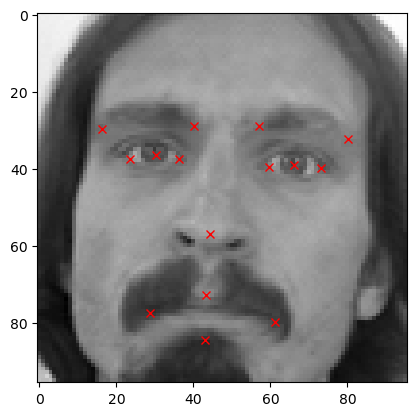

In [17]:
i=0
plt.imshow(keyfacial_df['Image'][i],cmap='gray')
for j in range(0,30,2):
  plt.plot(keyfacial_df.loc[i][j],keyfacial_df.loc[i][j+1],'rx')

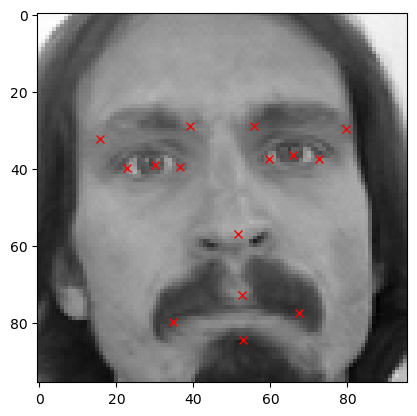

In [18]:
i=0
plt.imshow(hori_df['Image'][i],cmap='gray')
for j in range(0,30,2):
  plt.plot(hori_df.loc[i][j],hori_df.loc[i][j+1],'rx')

In [19]:
import copy
import random
bright_df=copy.copy(keyfacial_df)
bright_df['Image']=bright_df['Image'].apply(lambda x:np.clip(random.uniform(1.5,2)*x,0.0,255.0))

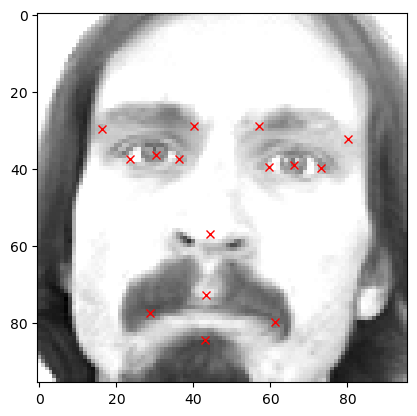

In [20]:
i=0
plt.imshow(bright_df['Image'][i],cmap='gray')
for j in range(0,30,2):
  plt.plot(bright_df.loc[i][j],bright_df.loc[i][j+1],'rx')

In [21]:
import copy
ver_df=copy.copy(keyfacial_df)
ver_df['Image']=ver_df['Image'].apply(lambda x:np.flip(x,axis=0))
for i in range(len(columns)):
  if i%2==1:
      ver_df[columns[i]]=ver_df[columns[i]].apply(lambda x: 96.-float(x))

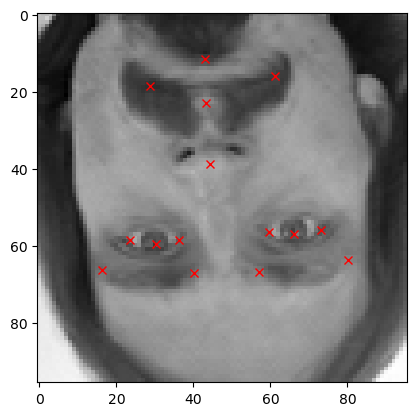

In [22]:
i=0
plt.imshow(ver_df['Image'][i],cmap='gray')
for j in range(0,30,2):
  plt.plot(ver_df.loc[i][j],ver_df.loc[i][j+1],'rx')

In [23]:
collective_df=np.concatenate((keyfacial_df,hori_df))
collective_df=np.concatenate((collective_df,bright_df))
#collective_df=np.concatenate((collective_df,ver_df))
collective_df.shape

(6420, 31)

Normalization

In [24]:
image=collective_df[:,30]

In [25]:
image=image/255

In [26]:
X = np.empty((len(image), 96, 96, 1))
X.shape

(6420, 96, 96, 1)

In [27]:
for i in range(len(image)):
  X[i,] = np.expand_dims(image[i], axis = 2)

In [28]:
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [29]:
y=collective_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(5136, 96, 96, 1) (5136, 30)
(1284, 96, 96, 1) (1284, 30)


In [31]:


def res_block(X,filter,stage):
  X_copy=X
  f1,f2,f3=filter

  #mainnpath
  X=Conv2D(f1,(1,1),strides=(1,1),name='res_'+str(stage)+'_conv_a',kernel_initializer=glorot_uniform(seed=0))(X)
  X=MaxPool2D((2,2))(X)
  X=BatchNormalization(axis=3,name = 'bn_'+str(stage)+'_conv_a')(X)
  X=Activation('relu')(X)

  X=X=Conv2D(f2,(3,3),strides=(1,1),padding = 'same',name='res_'+str(stage)+'_conv_b',kernel_initializer=glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3,name = 'bn_'+str(stage)+'_conv_b')(X)
  X=Activation('relu')(X)

  X=X=Conv2D(f3,(3,3),strides=(1,1),padding = 'same',name='res_'+str(stage)+'_conv_c',kernel_initializer=glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3,name = 'bn_'+str(stage)+'_conv_c')(X)


  #Shortpath
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)


  #Add
  X=Add()([X,X_copy])
  X=Activation('relu')(X)


  #identity block
  X_copy=X
  #main path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  #noshortpath
  #Add

  X = Add()([X,X_copy])
  X = Activation('relu')(X)


   # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)


  return X







   




In [32]:


input_shape=(96,96,1)

X_input=Input(input_shape)

X=ZeroPadding2D((3,3))(X_input)
X = Conv2D(filters=64,kernel_size=(7, 7), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name='conv1')(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)
X=res_block(X,[64,64,256],stage=2)
X=res_block(X,[128,128,512],stage=3)

X=AveragePooling2D((2,2),name='Average_Pooling')(X)
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)

model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']                  
                                                                                              

                                                                                                  
 activation_8 (Activation)      (None, 11, 11, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2_identity_2_c (Conv2D)    (None, 11, 11, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 11, 11, 256)  1024       ['res_2_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_2 (Add)                    (None, 11, 11, 256)  0           ['bn_2_identity_2_c[0][0]',      
                                                                  'activation_6[0][0]']           
          

                                                                                                  
 res_3_identity_2_c (Conv2D)    (None, 5, 5, 512)    66048       ['activation_17[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 5, 5, 512)   2048        ['res_3_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_5 (Add)                    (None, 5, 5, 512)    0           ['bn_3_identity_2_c[0][0]',      
                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 5, 5, 512)    0           ['add_5[0][0]']                  
          

In [33]:
adam=keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model_1_facialKeyPoints.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])

In [34]:
checkpoint=ModelCheckpoint(filepath="FacialKeyPoints_weights.hdf5", verbose=1,save_best_only=True)

In [ ]:
# history=model_1_facialKeyPoints.fit(X_train,y_train,batch_size=32,epochs=1,validation_split=0.05,callbacks=[checkpoint])

153/153 [==============================] - ETA: 0s - loss: 261.2807 - accuracy: 0.5755
Epoch 1: val_loss improved from inf to 1079.08398, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 175s 1s/step - loss: 261.2807 - accuracy: 0.5755 - val_loss: 1079.0840 - val_accuracy: 0.7043


In [35]:
model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


In [37]:
with open('Emotion AI Dataset/detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
    

In [39]:
model_1_facialKeyPoints=tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('Emotion AI Dataset/weights_keypoint.hdf5')
adam=tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])



In [42]:
result=model_1_facialKeyPoints.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 7s 166ms/step - loss: 7.2054 - accuracy: 0.8326
Accuracy : 0.8325545191764832


In [43]:
print(result[1])

0.8325545191764832


In [44]:
# history.history.keys()

In [45]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.show()

In [46]:
df = pd.read_csv('Emotion AI Dataset/icml_face_data.csv')

In [47]:
df.head()

emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3        2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...

In [48]:
def convert(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [49]:
# Resize images from (48, 48) to (96, 96)

def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [50]:
df[' pixels'] = df[' pixels'].apply(lambda x: convert(x))

In [51]:
df[' pixels'] = df[' pixels'].apply(lambda x: resize(x))

In [52]:
# check for the presence of null values in the data frame
df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [53]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

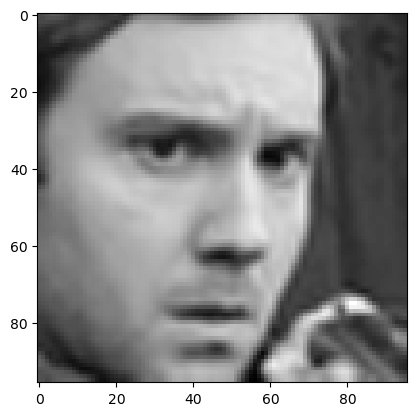

In [54]:
plt.imshow(df[' pixels'][0], cmap = 'gray')

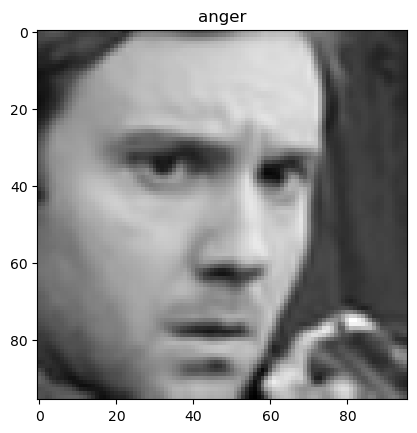

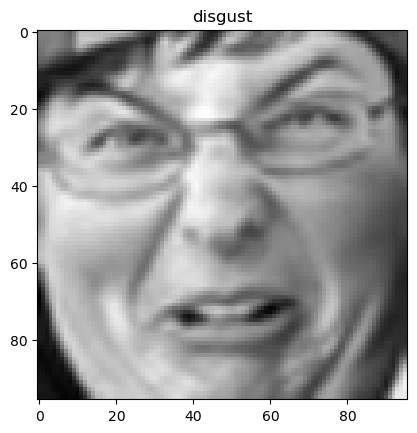

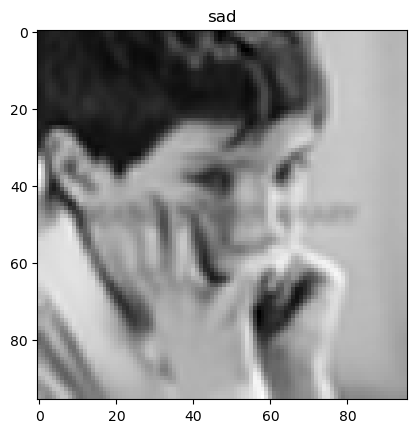

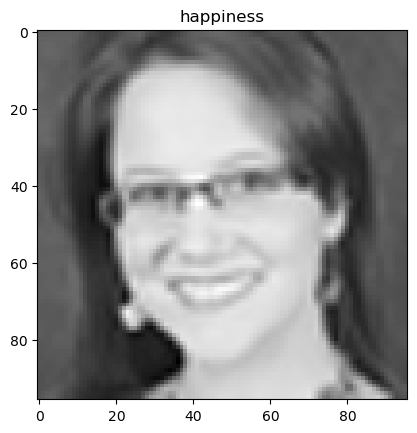

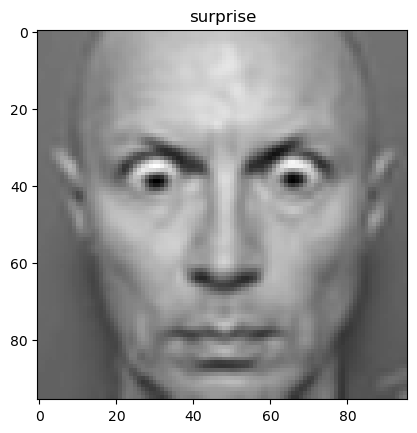

In [55]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = df[df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

<AxesSubplot: ylabel='emotion'>

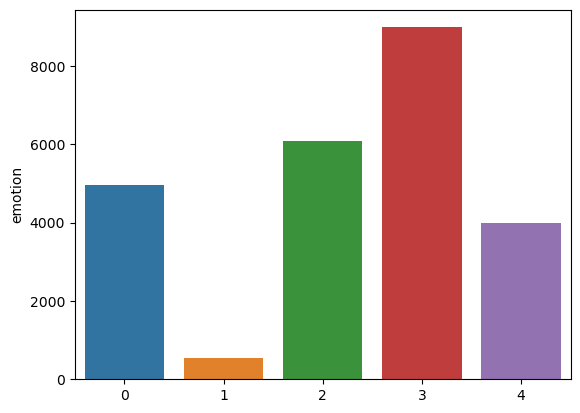

In [56]:
sns.barplot(x = df.emotion.value_counts().index, y = df.emotion.value_counts())

In [57]:
from keras.utils import to_categorical

X = df[' pixels']
y = to_categorical(df['emotion'])

In [58]:
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,shuffle=True)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,shuffle=True)

In [60]:
print(X_train.shape,y_train.shape)

(22111, 96, 96, 1) (22111, 5)


In [61]:
print(X_val.shape,y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [62]:
print(X_test.shape,y_test.shape)

(1229, 96, 96, 1) (1229, 5)


In [63]:
X_train=X_train/255
X_test=X_test/255
X_val=X_val/255

In [64]:
train_datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [65]:

input_shape=(96,96,1)
X_input=Input(input_shape)
X=ZeroPadding2D((3,3))(X_input)
X=Conv2D(64,(7,7),strides=(2,2),name = 'conv1',kernel_initializer=glorot_uniform(seed=0))(X)
X=BatchNormalization(axis=3, name = 'bn_conv1')(X)
X=Activation('relu')(X)
X=MaxPooling2D((3,3),strides=(2,2))(X)

X=res_block(X,[64,64,256],stage=2)
X=res_block(X,[128,128,512],stage=3)
#X = res_block(X, filter= [256, 256, 1024], stage= 4)
X=AveragePooling2D((4,4),name='Average_Pooling')(X)
X=Flatten()(X)
X=Dense(5,activation='softmax',name='final_dense',kernel_initializer=glorot_uniform(seed=0))(X)
model_2_emotion=Model(X_input,X,name='emotion')
model_2_emotion.summary()


Model: "emotion"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 102, 102, 1)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_1[0][0]']       
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']            

 ization)                                                                                         
                                                                                                  
 activation_27 (Activation)     (None, 11, 11, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2_identity_2_c (Conv2D)    (None, 11, 11, 256)  16640       ['activation_27[0][0]']          
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 11, 11, 256)  1024       ['res_2_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_8 (Add)                    (None, 11, 11, 256)  0           ['bn_2_identity_2_c[0][0]',      
          

 activation_36 (Activation)     (None, 5, 5, 128)    0           ['bn_3_identity_2_b[0][0]']      
                                                                                                  
 res_3_identity_2_c (Conv2D)    (None, 5, 5, 512)    66048       ['activation_36[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 5, 5, 512)   2048        ['res_3_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_11 (Add)                   (None, 5, 5, 512)    0           ['bn_3_identity_2_c[0][0]',      
                                                                  'activation_34[0][0]']          
                                                                                                  
 activatio

In [66]:
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [67]:
earlystopping=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [68]:
checkpoint=ModelCheckpoint(filepath="FacialExpression_weights.hdf5", verbose=1,save_best_only=True)

In [138]:
# history=model_2_emotion.fit(train_datagen.flow(X_train,y_train,batch_size=64),validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,epochs= 1, callbacks=[checkpoint, earlystopping])

345/345 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.4514
Epoch 1: val_loss improved from inf to 0.18085, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 669s 2s/step - loss: 0.1412 - accuracy: 0.4514 - val_loss: 0.1809 - val_accuracy: 0.2606


In [69]:
model_json = model_2_emotion.to_json()
with open("EFacialExpression-model.json","w") as json_file:
  json_file.write(model_json)


In [73]:
with open('Emotion AI Dataset/emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_2_emotion = keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('Emotion AI Dataset/weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [74]:
result = model_2_emotion.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(result[1]))

39/39 [==============================] - 8s 155ms/step - loss: 0.3839 - accuracy: 0.8511
Test Accuracy: 0.8510984778404236


In [83]:
# history.history.keys()

In [197]:
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

In [199]:
#epoch=range(len(accuracy))
#$plt.plot(epoch,accuracy)
#plt.plot(epoch,val_accuracy)
#plt.legend()

In [199]:
#epoch=range(len(accuracy))
#plt.plot(epoch,loss)
#plt.plot(epoch,val_loss)
#plt.legend()

In [75]:
predictions=np.argmax(model_2_emotion.predict(X_test),axis=-1)
y_true=np.argmax(y_test,axis=-1)


39/39 [==============================] - 7s 146ms/step


<AxesSubplot: >

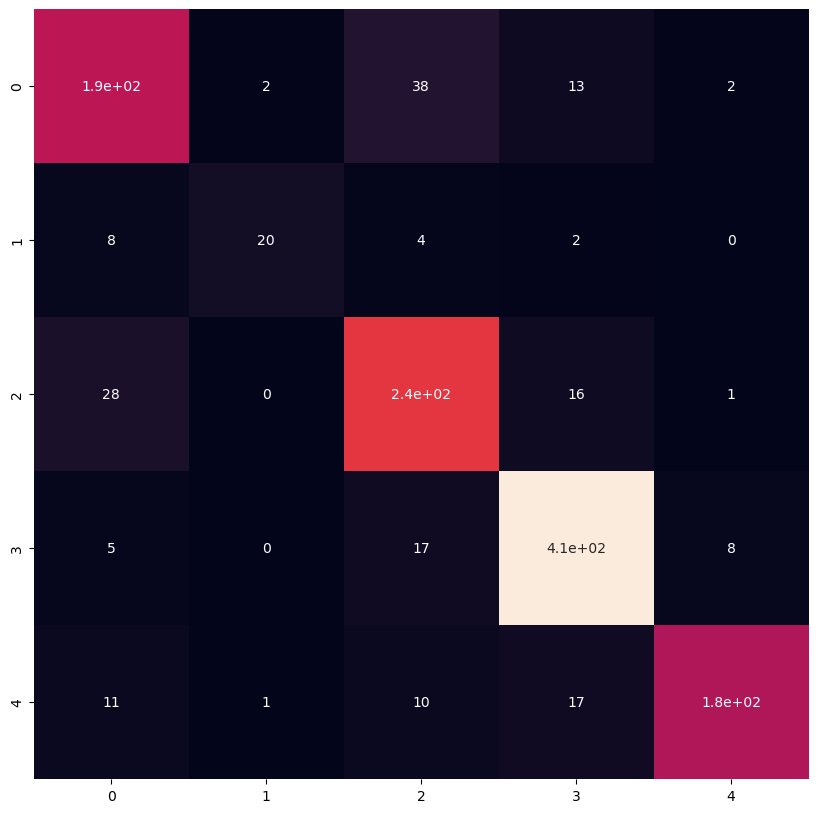

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

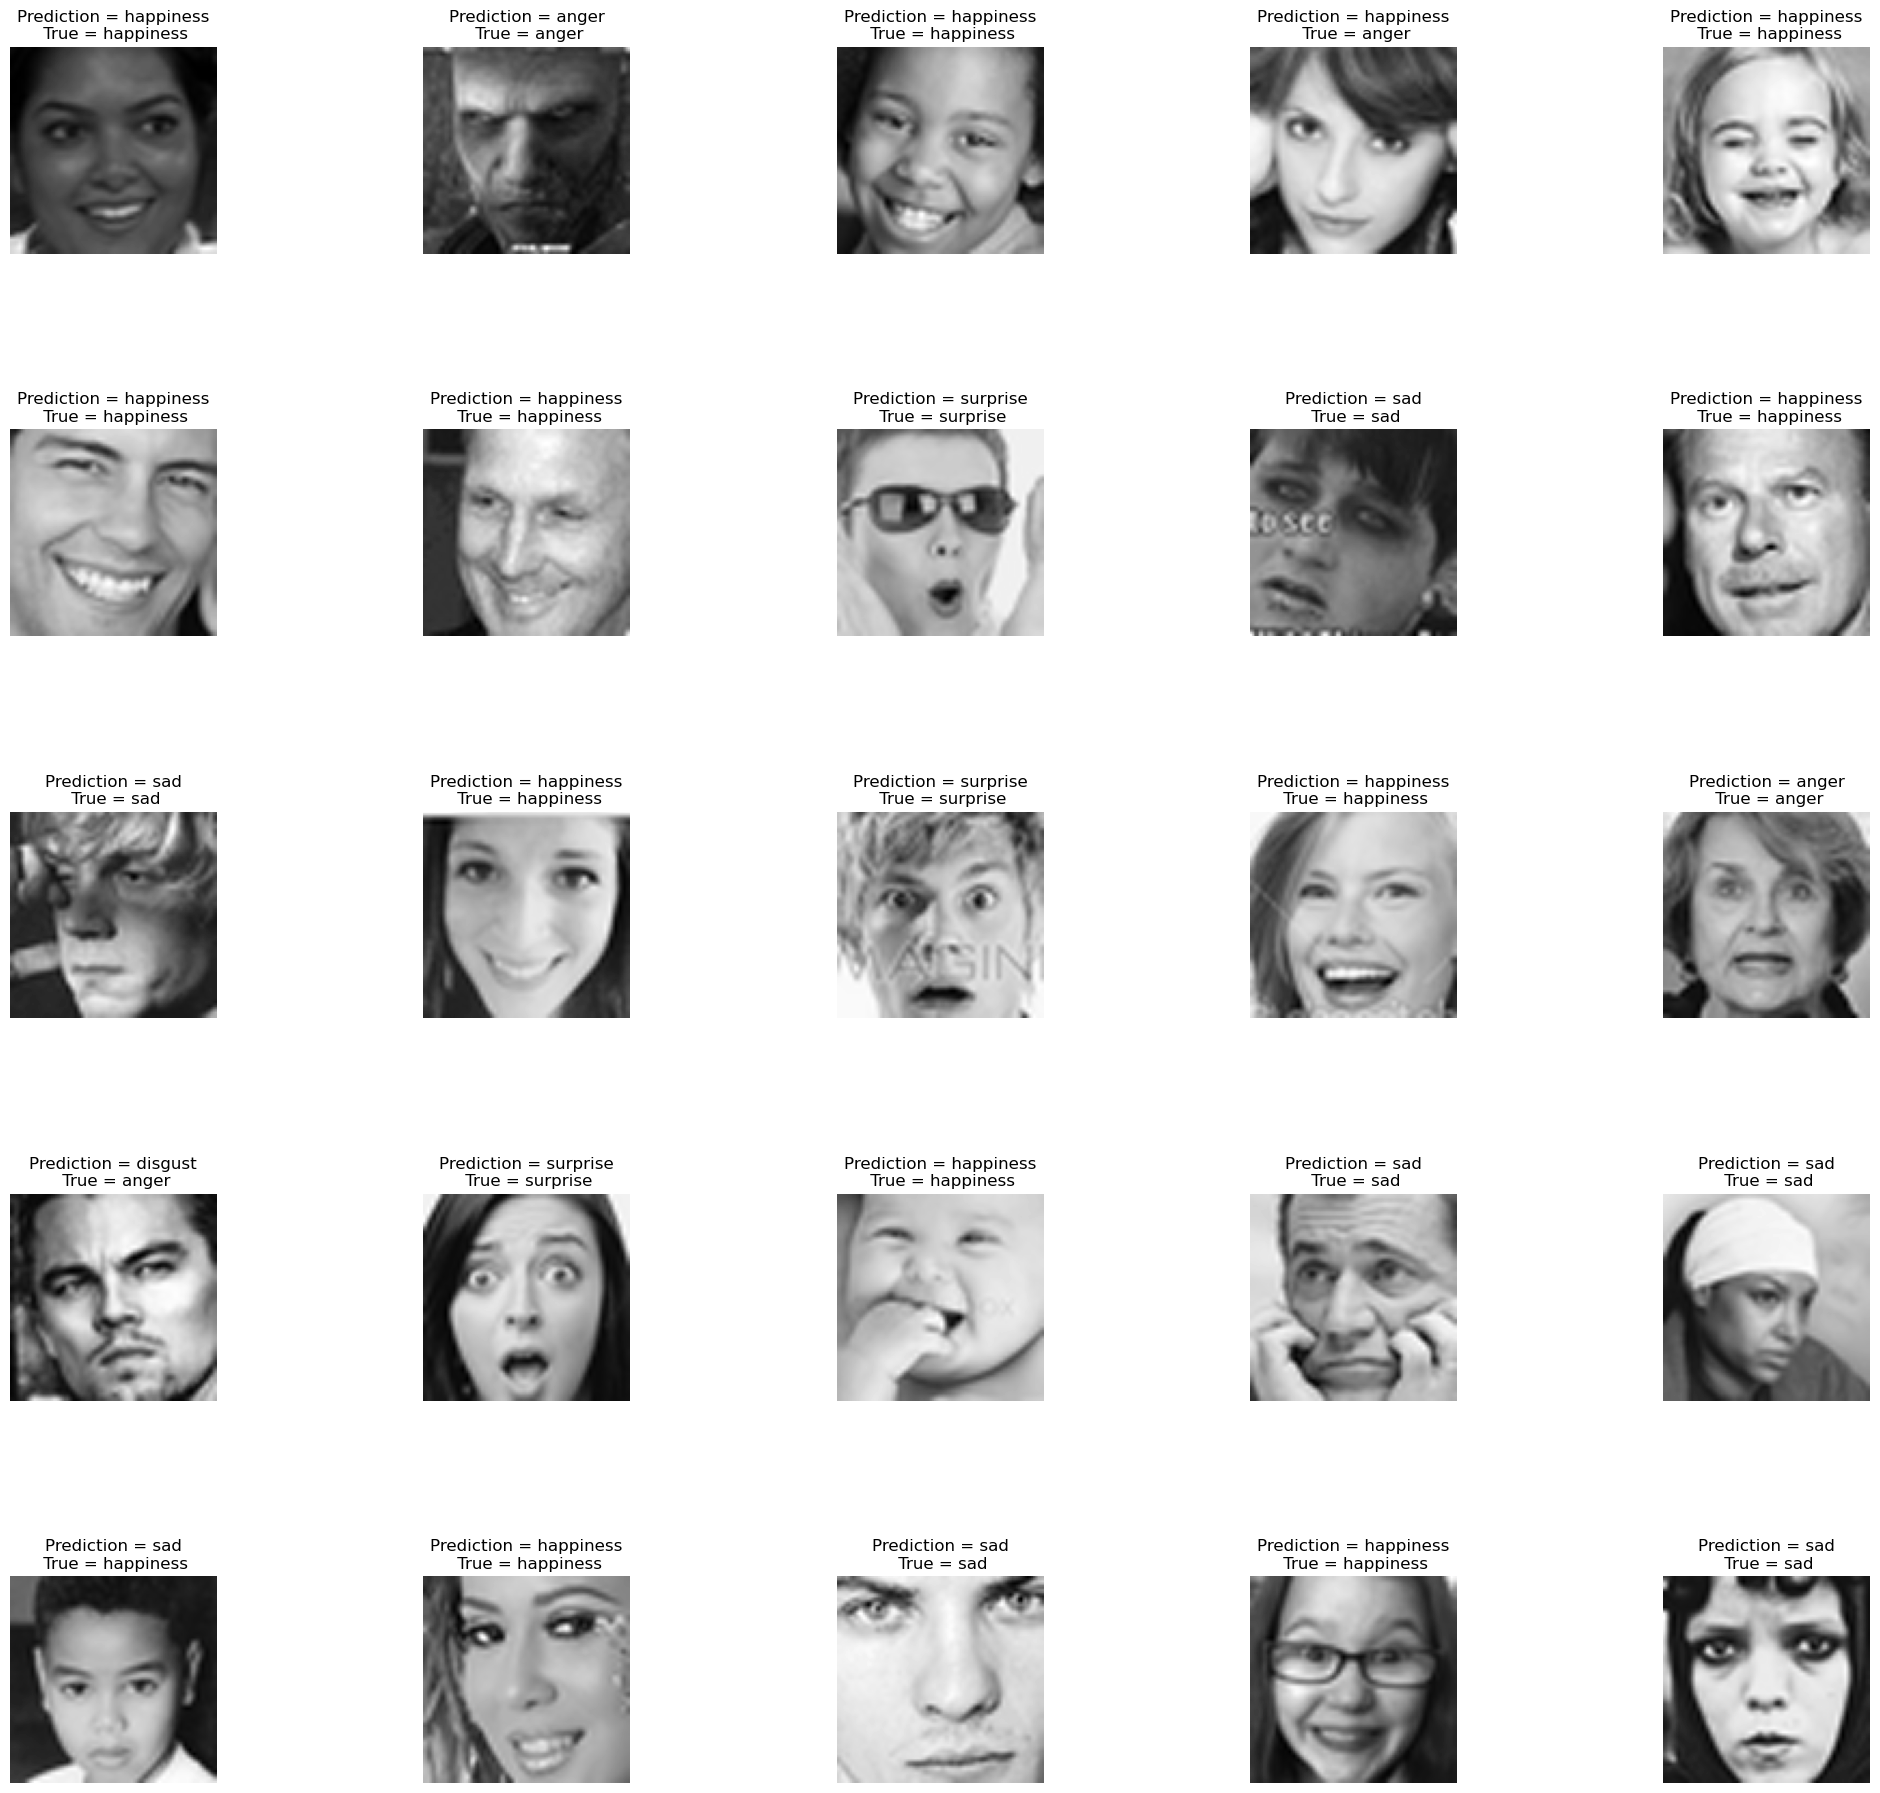

In [77]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predictions[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       249
           1       0.87      0.59      0.70        34
           2       0.78      0.84      0.81       285
           3       0.90      0.93      0.91       444
           4       0.94      0.82      0.88       217

    accuracy                           0.85      1229
   macro avg       0.85      0.79      0.82      1229
weighted avg       0.85      0.85      0.85      1229



In [79]:
def predict(X_test):
  df_keypoints=model_1_facialKeyPoints.predict(X_test)
  df_emotion=np.argmax(model_2_emotion.predict(X_test),axis=-1)
  df_emotion=np.expand_dims(df_emotion,axis=1)
  df_prediction=pd.DataFrame(df_keypoints,columns= columns)
  df_prediction['emotion']=df_emotion
  return df_prediction

In [80]:
df_predict = predict(X_test)

39/39 [==============================] - 6s 152ms/step


In [81]:
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          67.609451          35.629032           27.129759   
1          66.427315          33.543522           31.496477   
2          29.088150          33.630363           67.186905   
3          64.442467          37.979771           30.882486   
4          55.910954          40.866650           45.205662   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           38.404861                59.257210                37.370731   
1           35.495087                58.689995                35.222416   
2           40.122742                36.948769                36.356922   
3           36.388470                56.485291                39.150677   
4           41.459610                53.948997                41.434284   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                76.710396                36.019997                 35.853840   
1                73.370331                33.516537                 37.571869   
2                20.565002                32.604889                 58.613609   
3                72.002060                38.711761                 37.455982   
4                57.993446                41.608242                 47.111340   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 38.929142  ...   56.946190            70.093491   
1                 36.231464  ...   63.849594            66.626244   
2                 40.125938  ...   59.220387            22.876083   
3                 37.918037  ...   59.081295            59.532341   
4                 41.753460  ...   53.292656            54.763405   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            72.420319             29.558947             75.283295   
1            76.712372             37.135113             78.212311   
2            68.407089             62.260075             75.117622   
3            75.556648             31.689363             74.105659   
4            71.967865             46.968754             73.117088   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               49.906261               73.622116                  50.485596   
1               49.984859               79.712112                  50.377010   
2               41.187183               75.045563                  40.325260   
3               44.019360               75.627136                  43.896000   
4               50.331783               68.356102                  50.963104   

   mouth_center_bottom_lip_y  emotion  
0                  82.249275        3  
1                  81.752213        0  
2                  79.738190        3  
3                  78.098541        3  
4                  78.354935        3  

[5 rows x 31 columns]

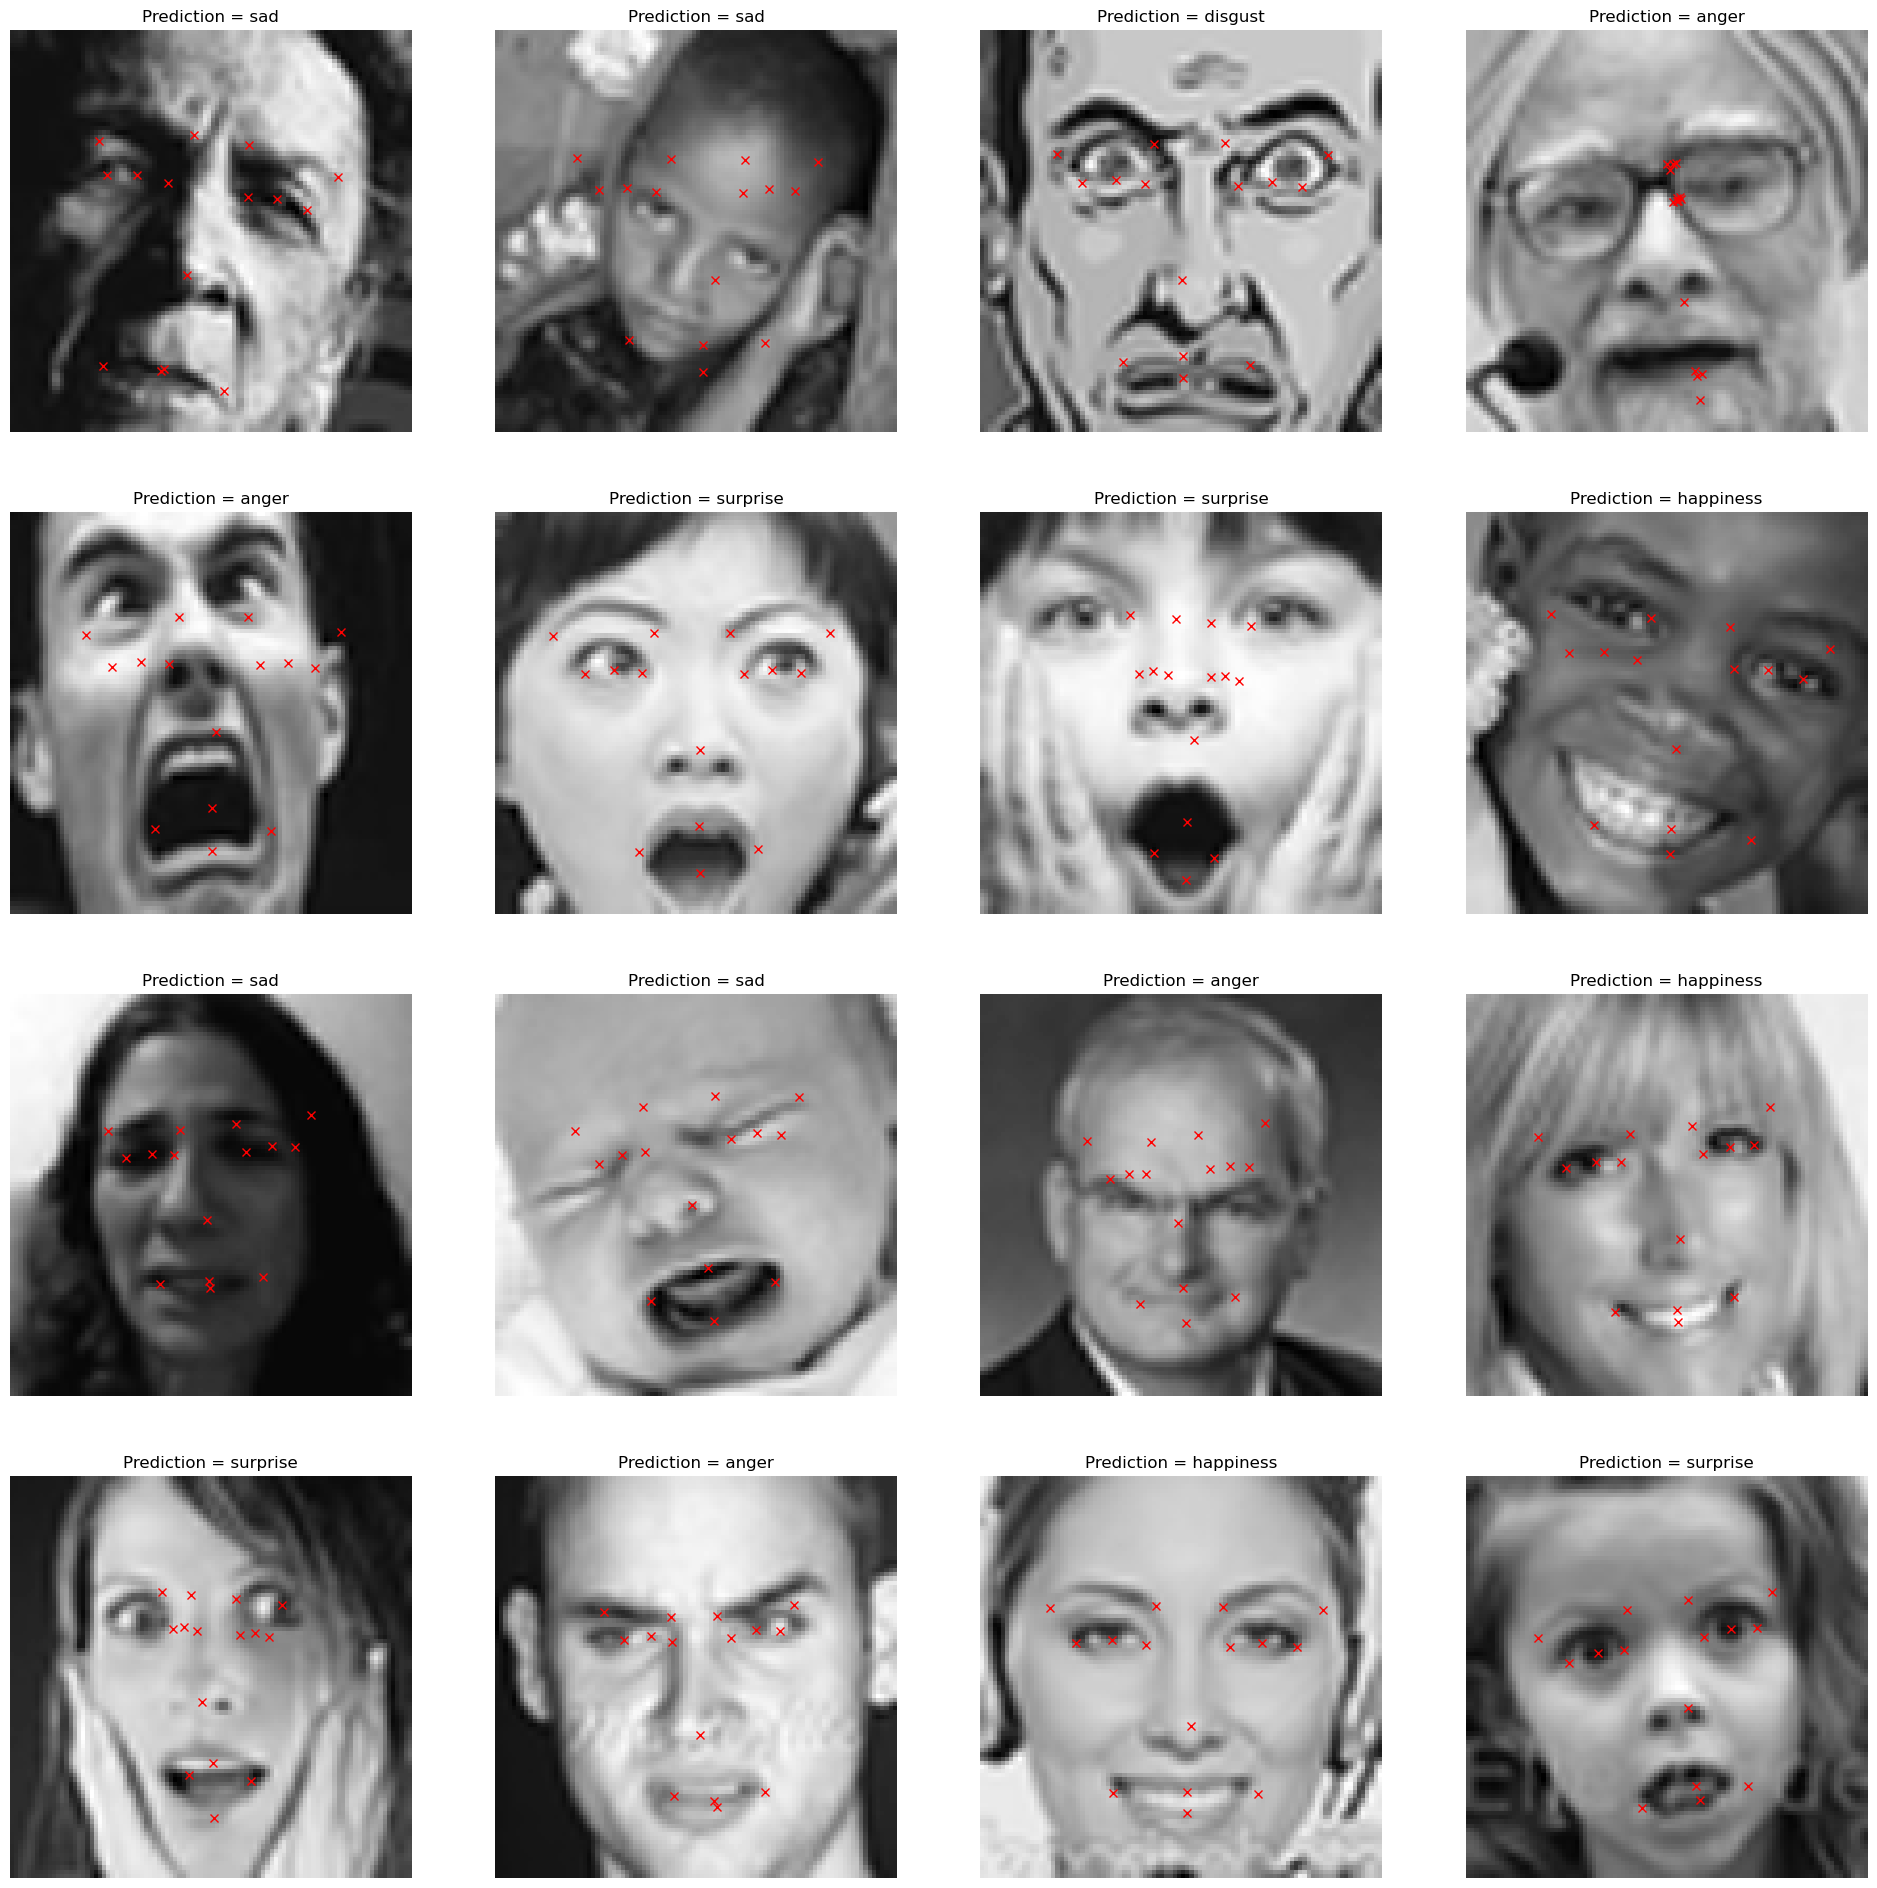

In [82]:

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()
for i in range(16):
  k=np.random.randint(1,len(X_test))
  axes[i].imshow(X_test[k].squeeze(),cmap='gray')
  axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][k]]))
  axes[i].axis('off')
  for j in range(0,30,2):
            axes[i].plot(df_predict.loc[k][j], df_predict.loc[k][j+1], 'rx')